In [16]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import datetime
import random
import seaborn as sns
import plotly.express as px

from collections import defaultdict
from scipy.stats import pearsonr

from sklearn.metrics import silhouette_score

In [17]:
df = pd.read_csv('df_scaled.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197914 entries, 0 to 197913
Data columns (total 41 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   povertyPercentage                 197914 non-null  float64
 1   males_percentage_per_city         197914 non-null  float64
 2   females_percentage_per_city       197914 non-null  float64
 3   killed_percentage_per_district    197914 non-null  float64
 4   injured_percentage_per_district   197914 non-null  float64
 5   arrested_percentage_per_district  197914 non-null  float64
 6   unharmed_percentage_per_district  197914 non-null  float64
 7   killed_percentage                 197914 non-null  float64
 8   injury_percentage                 197914 non-null  float64
 9   arrest_percentage                 197914 non-null  float64
 10  unharmed_rate                     197914 non-null  float64
 11  winning_party_percentage          197914 non-null  f

In [18]:
df = df.loc[df['state'] == 'illinois']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15935 entries, 1729 to 197852
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   povertyPercentage                 15935 non-null  float64
 1   males_percentage_per_city         15935 non-null  float64
 2   females_percentage_per_city       15935 non-null  float64
 3   killed_percentage_per_district    15935 non-null  float64
 4   injured_percentage_per_district   15935 non-null  float64
 5   arrested_percentage_per_district  15935 non-null  float64
 6   unharmed_percentage_per_district  15935 non-null  float64
 7   killed_percentage                 15935 non-null  float64
 8   injury_percentage                 15935 non-null  float64
 9   arrest_percentage                 15935 non-null  float64
 10  unharmed_rate                     15935 non-null  float64
 11  winning_party_percentage          15935 non-null  float64
 12  kille

In [19]:
column_to_drop = ['n_participants','n_participants_child', 'n_participants_teen',
       'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed','date', 'latitude', 'longitude','congressional_district', 'candidatevotes', 'totalvotes', 'total_votes_for_state', 'involve_killing', 'pc1', 'pc2']
for col in df.columns:
    if df[col].dtype == 'object':
       column_to_drop.append(col)
column_to_drop

['n_participants',
 'n_participants_child',
 'n_participants_teen',
 'n_participants_adult',
 'n_males',
 'n_females',
 'n_killed',
 'n_injured',
 'n_arrested',
 'n_unharmed',
 'date',
 'latitude',
 'longitude',
 'congressional_district',
 'candidatevotes',
 'totalvotes',
 'total_votes_for_state',
 'involve_killing',
 'pc1',
 'pc2',
 'date',
 'state',
 'city_or_county',
 'incident_characteristics1',
 'party']

In [20]:
df_categorical = df[column_to_drop]
df_numeric = df.drop(columns=column_to_drop)

In [21]:
df_categorical.info()
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15935 entries, 1729 to 197852
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   n_participants             15935 non-null  float64
 1   n_participants_child       15935 non-null  int64  
 2   n_participants_teen        15935 non-null  int64  
 3   n_participants_adult       15935 non-null  int64  
 4   n_males                    15935 non-null  float64
 5   n_females                  15935 non-null  float64
 6   n_killed                   15935 non-null  float64
 7   n_injured                  15935 non-null  float64
 8   n_arrested                 15935 non-null  float64
 9   n_unharmed                 15935 non-null  float64
 10  date                       15935 non-null  object 
 11  latitude                   15935 non-null  float64
 12  longitude                  15935 non-null  float64
 13  congressional_district     15935 non-null  int6

# Hierarchical clustering (Agglomerative)

In [22]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from tqdm import tqdm
from sklearn import metrics

In [40]:
table = []
for metric in ['cityblock','correlation', 'cosine', 'dice', 'euclidean']:
    methods = ['complete','single','average','weighted']
    if metric == 'euclidean':
        methods += ['ward','median','centroid']
    for method in methods:
        for truncation_mode in [None, 'lastp','level']:
            for level in [2,5,10,15]:
                for k in [6, 7,8,9,10]:
                    distances = pdist(df_numeric, metric=metric)
                    dlinkage = linkage(distances, metric=metric, method=method)
                    labels = fcluster(dlinkage,k,criterion='maxclust')
                    current_silhouette = silhouette_score(df_numeric, labels)
                    current_bouldin = metrics.davies_bouldin_score(df_numeric, labels)
                    print(f"metric: {metric}, method:{method}, truncation_mode:{truncation_mode}, level':{level}, k:{k}, silhouette: {current_silhouette} , DBscore:{current_bouldin}")
                    dendrogram(dlinkage, truncate_mode=truncation_mode, p=level, leaf_rotation=90)
                    plt.show()
                    table.append({'metric':metric, 'method':method, 'truncation_mode': truncation_mode, 'level':level, 'k':k, 'silhouette': current_silhouette, 'DBscore':current_bouldin})

df_table = pd.DataFrame(table)

KeyboardInterrupt: 

In [ ]:

""" scatterplot(df[numeric_attributes+['pc1','pc2']], 'pc1','pc2',c_labels=labels,filename=os.path.join('hierarchical',directory, 'scatterplot.png'))

plots(df, labels, os.path.join('hierarchical',directory), attributes=numeric_attributes) """


In [34]:
table_df = pd.DataFrame(table)
table_df.sort_values(by='silhouette', ascending=False)

,metric,method,truncation_mode,level,k,silhouette,DBscore
90,cityblock,single,lastp,10,6,0.321297,0.385982
100,cityblock,single,level,2,6,0.321297,0.385982
65,cityblock,single,None,5,6,0.321297,0.385982
115,cityblock,single,level,15,6,0.321297,0.385982
70,cityblock,single,None,10,6,0.321297,0.385982
...,...,...,...,...,...,...,...
69,cityblock,single,None,5,10,0.107851,0.477890
74,cityblock,single,None,10,10,0.107851,0.477890
84,cityblock,single,lastp,2,10,0.107851,0.477890
109,cityblock,single,level,5,10,0.107851,0.477890


Final Model

{'icoord': [[115.0, 115.0, 125.0, 125.0],
  [155.0, 155.0, 165.0, 165.0],
  [185.0, 185.0, 195.0, 195.0],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [415.0, 415.0, 425.0, 425.0],
  [505.0, 505.0, 515.0, 515.0],
  [575.0, 575.0, 585.0, 585.0],
  [615.0, 615.0, 625.0, 625.0],
  [715.0, 715.0, 725.0, 725.0],
  [865.0, 865.0, 875.0, 875.0],
  [935.0, 935.0, 945.0, 945.0],
  [965.0, 965.0, 975.0, 975.0],
  [995.0, 995.0, 1005.0, 1005.0],
  [1035.0, 1035.0, 1045.0, 1045.0],
  [1095.0, 1095.0, 1105.0, 1105.0],
  [1085.0, 1085.0, 1100.0, 1100.0],
  [1075.0, 1075.0, 1092.5, 1092.5],
  [1065.0, 1065.0, 1083.75, 1083.75],
  [1115.0, 1115.0, 1125.0, 1125.0],
  [1145.0, 1145.0, 1155.0, 1155.0],
  [1135.0, 1135.0, 1150.0, 1150.0],
  [1120.0, 1120.0, 1142.5, 1142.5],
  [1074.375, 1074.375, 1131.25, 1131.25],
  [1175.0, 1175.0, 1185.0, 1185.0],
  [1315.0, 1315.0, 1325.0, 1325.0],
  [1305.0, 1305.0, 1320.0, 1320.0],
  [1295.0, 1295.0, 1312.5, 1312.5],
  [1385.0, 1385.0, 1395.0, 1

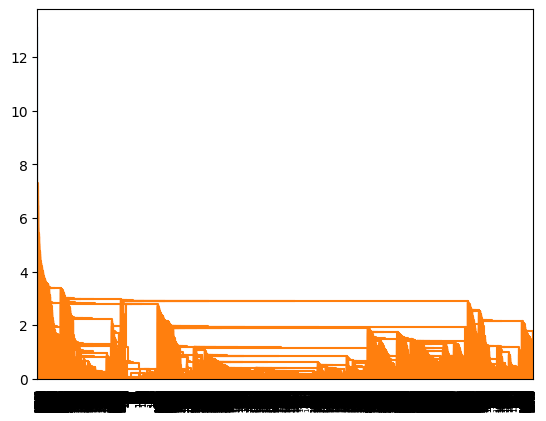

In [39]:
""" metric = 'cityblock' 
method = 'single'
truncation_mode = None
level = 5
k = 6

distances = pdist(df_numeric, metric=metric)
dlinkage = linkage(distances, metric=metric, method=method)
labels = fcluster(dlinkage,k,criterion='maxclust')
dendrogram(dlinkage, truncate_mode=truncation_mode, p=level, leaf_rotation=90) """